In [2]:
import pandas as pd
import talib as tb
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
data_file = "snp500.csv"

In [4]:
data = pd.read_csv("../data/{}".format(data_file))
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head(10)

,timestamp,open,high,low,close,price,volume
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,16.760000,2970000
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,16.670000,3330000
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,16.719999,1460000


In [5]:
start_date = pd.Timestamp(2010, 1, 1)
data = data[data['timestamp'] >= start_date].reset_index(drop=True)
data.set_index("timestamp", inplace=True)
data.head(10)

,open,high,low,close,price,volume
timestamp,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,1146.979980,4255780000
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,1136.219971,4716160000
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,1145.680054,4170360000
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,1148.459961,3915200000


In [6]:
data['SMA_21'] = data['price'].rolling(21).mean()
data['SMA_90'] = data['price'].rolling(90).mean()

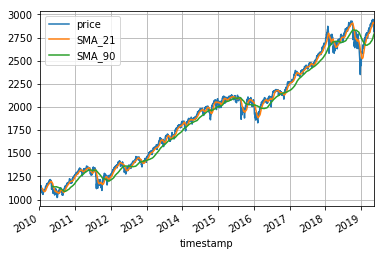

In [7]:
data[['price', 'SMA_21', 'SMA_90']].plot(grid=True)

In [8]:
# clear initial windows
data.dropna(inplace=True)

In [10]:
# SMA strategy
tradelog = []
init_cap = 1e6
commission = 2
side = None
size = 0
for it, row in data.iterrows():
    if row['SMA_21'] > row['SMA_90']:
        if side != "BUY":
            side = "BUY"
            price = row['price']
            size += init_cap / price
            trade_string = "{},SPX,BUY,{},{},{}".format(it, size, price, commission)
            print(trade_string)
            tradelog.append(trade_string.split(","))
    else:
        if side != "SELL":
            side = "SELL"
            price = row['price']
            size += init_cap / price
            trade_string = "{},SPX,SELL,{},{},{}".format(it, size, price, commission)
            print(trade_string)
            tradelog.append(trade_string.split(","))
if side == "BUY":
    price = row['price']
    trade_string = "{},SPX,SELL,{},{},{}".format(it, size, price, commission)
    print(trade_string)
    tradelog.append(trade_string.split(","))
else:
    price = row['price']
    trade_string = "{},SPX,BUY,{},{},{}".format(it, size, price, commission)
    print(trade_string)
    tradelog.append(trade_string.split(","))

2010-05-12 00:00:00,SPX,BUY,853.4826038447391,1171.670044,2
2010-05-26 00:00:00,SPX,SELL,1789.8560725298835,1067.949951,2
2010-09-20 00:00:00,SPX,BUY,2664.9687731533095,1142.709961,2
2011-06-09 00:00:00,SPX,SELL,3440.763963223131,1289.0,2
2011-07-22 00:00:00,SPX,BUY,4184.247320444832,1345.02002,2
2011-08-03 00:00:00,SPX,SELL,4977.684033535624,1260.339966,2
2011-11-03 00:00:00,SPX,BUY,5770.611108800065,1261.150024,2
2012-05-21 00:00:00,SPX,SELL,6530.495308223193,1315.98999,2
2012-07-27 00:00:00,SPX,BUY,7252.011662057674,1385.969971,2
2012-11-15 00:00:00,SPX,SELL,7990.9297622345675,1353.329956,2
2013-01-02 00:00:00,SPX,BUY,8674.727829761601,1462.420044,2
2014-10-14 00:00:00,SPX,SELL,9207.294281322424,1877.699951,2
2014-11-12 00:00:00,SPX,BUY,9697.911232138074,2038.25,2
2015-07-02 00:00:00,SPX,SELL,10179.425877905116,2076.780029,2
2015-08-06 00:00:00,SPX,BUY,10659.373645995827,2083.560059,2
2015-08-13 00:00:00,SPX,SELL,11139.3606150024,2083.389893,2
2015-10-30 00:00:00,SPX,BUY,11620.27779

In [11]:
tradelog_df = pd.DataFrame(tradelog, columns=['timestamp', 'ticker', 'side', 'size', 'price', 'commission'])
tradelog_df.head(10)

,timestamp,ticker,side,size,price,commission
0,2010-05-12 00:00:00,SPX,BUY,853.4826038447391,1171.670044,2
1,2010-05-26 00:00:00,SPX,SELL,1789.8560725298835,1067.949951,2
2,2010-09-20 00:00:00,SPX,BUY,2664.9687731533095,1142.709961,2
3,2011-06-09 00:00:00,SPX,SELL,3440.763963223131,1289.0,2
4,2011-07-22 00:00:00,SPX,BUY,4184.247320444832,1345.02002,2
5,2011-08-03 00:00:00,SPX,SELL,4977.684033535624,1260.339966,2
6,2011-11-03 00:00:00,SPX,BUY,5770.611108800065,1261.150024,2
7,2012-05-21 00:00:00,SPX,SELL,6530.495308223193,1315.98999,2
8,2012-07-27 00:00:00,SPX,BUY,7252.011662057674,1385.969971,2
9,2012-11-15 00:00:00,SPX,SELL,7990.9297622345675,1353.329956,2


In [55]:
tradelog_df.to_csv("../data/tradelog_{}".format(data_file), index=False)

In [20]:
tradelog_df['timestamp'] = pd.to_datetime(tradelog_df['timestamp'])
tradelog_df.set_index("timestamp").index.map(lambda x: x.replace(day=1)).unique()

DatetimeIndex(['2010-05-01', '2010-09-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-11-01', '2012-05-01', '2012-07-01',
               '2012-11-01', '2013-01-01', '2014-10-01', '2014-11-01',
               '2015-07-01', '2015-08-01', '2015-10-01', '2016-01-01',
               '2016-03-01', '2016-10-01', '2016-11-01', '2018-03-01',
               '2018-05-01', '2018-10-01', '2019-02-01', '2019-05-01'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [26]:
tradelog_df.price.apply(pd.to_numeric).pct_change().std()

0.07920531063233796

In [27]:
data.loc[pd.Timestamp(2010, 5, 10):]

,open,high,low,close,price,volume,SMA_21,SMA_90
timestamp,,,,,,,,
2010-05-12,1155.430054,1172.869995,1155.430054,1171.670044,1171.670044,5225460000,1185.693819,1143.897774
2010-05-13,1170.040039,1173.569946,1156.140015,1157.439941,1157.439941,4870640000,1183.160005,1144.169440
2010-05-14,1157.189941,1157.189941,1126.140015,1135.680054,1135.680054,6126400000,1179.541434,1144.160107
2010-05-17,1136.520020,1141.880005,1114.959961,1136.939941,1136.939941,5922920000,1176.913336,1144.157884
2010-05-18,1138.780029,1148.660034,1117.199951,1120.800049,1120.800049,6170840000,1173.260004,1143.925774
2010-05-19,1119.569946,1124.270020,1100.660034,1115.050049,1115.050049,6765800000,1168.873337,1143.593220
2010-05-20,1107.339966,1107.339966,1071.579956,1071.589966,1071.589966,8328570000,1162.475720,1142.755553
2010-05-21,1067.260010,1090.160034,1055.900024,1087.689941,1087.689941,5452130000,1156.714762,1142.216330
2010-05-24,1084.780029,1089.949951,1072.699951,1073.650024,1073.650024,5224040000,1149.875238,1141.415997
